# Π Study
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/14/2022|

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

## AB
$\tau_S=0.1$

$\epsilon=1.0$

### DDD

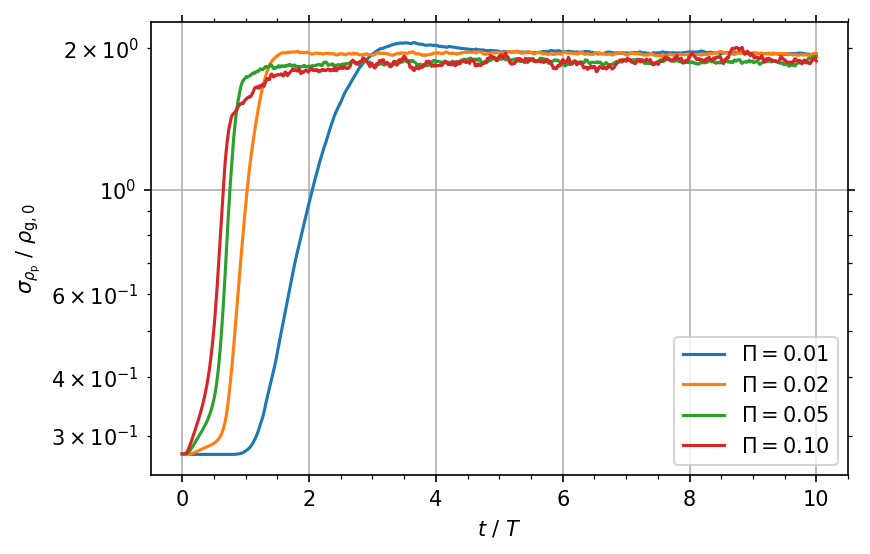

In [10]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'

for Pi in Pis:
    hst = athena_read.hst('../unstrat/%s/%s/%s/output/SI.hst'%(run, Pi, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label='$\Pi=$'+Pi)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)

### CPDD

AB/0.01/2048: 29.0% ρₚ = 0
AB/0.02/2048: 31.2% ρₚ = 0
AB/0.05/2048: 30.4% ρₚ = 0
AB/0.10/2048: 29.1% ρₚ = 0


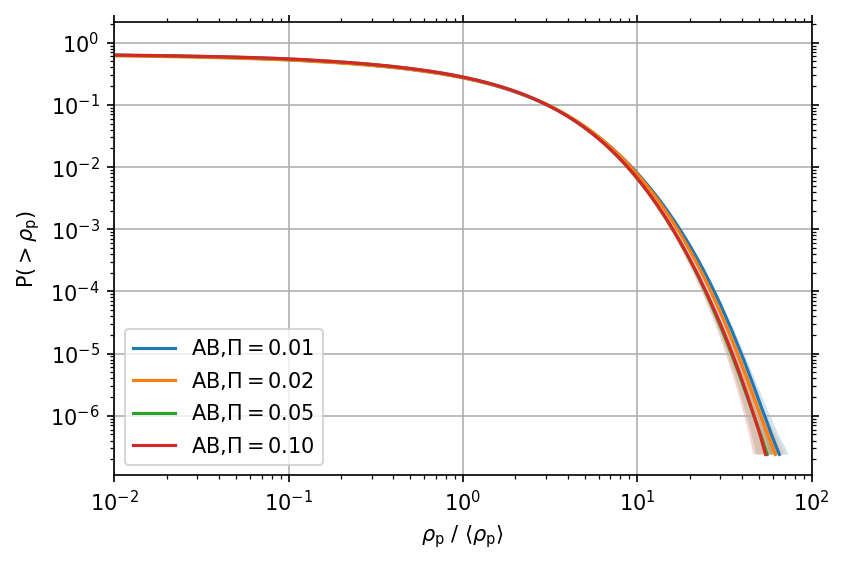

In [11]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
xlim = (1e-2, 1e2)
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=1000,
                     base=2, dtype=int))

for Pi in Pis:
    with np.load('../unstrat/%s/%s/%s/output/cpdd.npz'\
                 %(run, Pi, res)) as data:
       pc0s = 100*(1-(np.count_nonzero(data['avgs'])/data['avgs'].size))
       print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, pc0s))
       avgs = np.flip(np.take_along_axis(data['avgs'], indices, 0))
       cdf = np.flip(np.take_along_axis(data['cdf'], indices, 0))
       stds = np.flip(np.take_along_axis(data['stds'], indices, 0))
       ax.loglog(avgs, cdf, label=run+r',$\Pi=$'+Pi)
       ax.fill_betweenx(cdf, avgs/stds, avgs*stds, alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)

## BA
$\tau_S=1.0$

$\epsilon=0.2$

### DDD

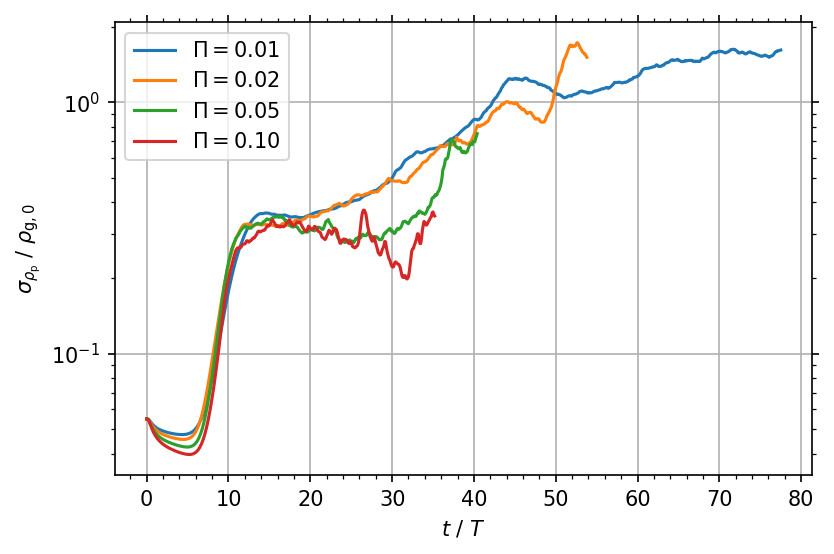

In [12]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'

for Pi in Pis:
    hst = athena_read.hst('../unstrat/%s/%s/%s/output/SI.hst'%(run, Pi, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label='$\Pi=$'+Pi)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)

### CPDD

In [ ]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
xlim = (1e-2, 1e2)
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=1000,
                     base=2, dtype=int))

for Pi in Pis:
    with np.load('../unstrat/%s/%s/%s/output/cpdd.npz'\
                 %(run, Pi, res)) as data:
       pc0s = 100*(1-(np.count_nonzero(data['avgs'])/data['avgs'].size))
       print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, pc0s))
       avgs = np.flip(np.take_along_axis(data['avgs'], indices, 0))
       cdf = np.flip(np.take_along_axis(data['cdf'], indices, 0))
       stds = np.flip(np.take_along_axis(data['stds'], indices, 0))
       ax.loglog(avgs, cdf, label=run+r',$\Pi=$'+Pi)
       ax.fill_betweenx(cdf, avgs/stds, avgs*stds, alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)